# Predicting Particulate Matter (PM2.5) Concentrations in the Air of China

## Exploring Shanghai Data

In [61]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Dara preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split
#from sklearn.cross_validation import train_test_split

# Pretty display for notebooks
%matplotlib inline

import os
print(os.listdir("../China/China_dataset"))

# Load Beijing dataset
dataset_Shanghai = pd.read_csv('../China/China_dataset/Shanghai.csv', parse_dates={'date' : ['year', 'month', 'day']})

display(dataset_Shanghai.head(n=3))
display(dataset_Shanghai.info())

dataset_Shanghai['year'] = dataset_Shanghai['date'].dt.year   
dataset_Shanghai['month'] = dataset_Shanghai['date'].dt.month
dataset_Shanghai['day'] = dataset_Shanghai['date'].dt.strftime('%w').astype(int)
print(dataset_Shanghai["day"].value_counts())
# day_type: 1 if the day weekend, 0 if the day weekday
dataset_Shanghai['day_Type'] = dataset_Shanghai['day'].apply(lambda x: 'Weekends' if x >= 5 else 'Weekdays').astype('category')

dataset_Shanghai = dataset_Shanghai.drop('date', axis=1)

# Success - Display the first five records
display(dataset_Shanghai.head(n=3))
display(dataset_Shanghai.info())

# Total number of records
n_records = len(dataset_Shanghai["PM_US Post"])

# Print the results
print("Total number of records: {}".format(n_records))

['Beijing.csv', 'Chengdu.csv', 'Guangzhou.csv', 'Shanghai.csv', 'Shenyang.csv']


,date,No,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,new_wind
0,2010-01-01,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0,1.0
1,2010-01-01,2,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0,2.0
2,2010-01-01,3,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 16 columns):
date             52584 non-null datetime64[ns]
No               52584 non-null int64
hour             52584 non-null int64
season           52584 non-null int64
PM_Jingan        24700 non-null float64
PM_US Post       34039 non-null float64
PM_Xuhui         25189 non-null float64
DEWP             52571 non-null float64
HUMI             52571 non-null float64
PRES             52556 non-null float64
TEMP             52571 non-null float64
cbwd             52572 non-null object
Iws              52572 non-null float64
precipitation    48575 non-null float64
Iprec            48575 non-null float64
new_wind         52572 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(3), object(1)
memory usage: 6.4+ MB


None

6    7512
5    7512
4    7512
3    7512
2    7512
1    7512
0    7512
Name: day, dtype: int64


,No,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,new_wind,year,month,day,day_Type
0,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0,1.0,2010,1,5,Weekends
1,2,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0,2.0,2010,1,5,Weekends
2,3,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0,2.0,2010,1,5,Weekends


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 19 columns):
No               52584 non-null int64
hour             52584 non-null int64
season           52584 non-null int64
PM_Jingan        24700 non-null float64
PM_US Post       34039 non-null float64
PM_Xuhui         25189 non-null float64
DEWP             52571 non-null float64
HUMI             52571 non-null float64
PRES             52556 non-null float64
TEMP             52571 non-null float64
cbwd             52572 non-null object
Iws              52572 non-null float64
precipitation    48575 non-null float64
Iprec            48575 non-null float64
new_wind         52572 non-null float64
year             52584 non-null int64
month            52584 non-null int64
day              52584 non-null int64
day_Type         52584 non-null category
dtypes: category(1), float64(11), int64(6), object(1)
memory usage: 7.3+ MB


None

Total number of records: 52584


## Assessing Shanghai Data

- Precipitation, Iprec columns have zeros values --> it seems fine
- Drop columns: row, PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan
- Convert Season to categorical 
- Year ? 
- Fix Hour values
- Remove records before 2013
- Add a city column
- Fix outliers in columns: PM_US Post, HUMI, TEMP, Iws, DEWP, precipitation, Iprec
- Remove missing values
- Convert Numerical to categorical data
- Drop Iprec: Cumulated precipitation (mm)


## Cleaning Shanghai Data

In [62]:
# First make copies for cleaning
dataset_Shanghai_clean = dataset_Shanghai.copy()

In [63]:
#Drop columns: row, PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan, precipitation, Iprec
Unneeded_Columns = ['No', 'PM_Jingan','PM_Xuhui', 'Iprec', 'Iws']
dataset_Shanghai_clean = dataset_Shanghai_clean.drop(Unneeded_Columns, axis = 1)
display(dataset_Shanghai_clean.head(n=5))
len(dataset_Shanghai_clean)

,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
0,0,4,NaN,-6.0,59.48,1026.1,1.0,cv,0.0,1.0,2010,1,5,Weekends
1,1,4,NaN,-6.0,59.48,1025.1,1.0,SE,0.0,2.0,2010,1,5,Weekends
2,2,4,NaN,-7.0,59.21,1025.1,0.0,SE,0.0,2.0,2010,1,5,Weekends
3,3,4,NaN,-6.0,63.94,1024.0,0.0,SE,0.0,1.0,2010,1,5,Weekends
4,4,4,NaN,-6.0,63.94,1023.0,0.0,SE,0.0,3.0,2010,1,5,Weekends


52584

In [64]:
# Remove records before 2013
dataset_Shanghai_clean = dataset_Shanghai_clean.drop(dataset_Shanghai_clean[dataset_Shanghai_clean.year < 2013].index)

print("Total number of records after removing years before 2013: ", len(dataset_Shanghai_clean))


print('The statistical summary of air quality data in Shanghai')
display(np.round(dataset_Shanghai_clean.describe(), 3))

print('The information summary of air quality data in Shanghai')
display(dataset_Shanghai_clean.info())


Total number of records after removing years before 2013:  26280
The statistical summary of air quality data in Shanghai


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,26280.000,26280.000,25510.000,26275.000,26275.000,26260.000,26275.000,24194.000,26276.000,26280.000,26280.000,26280.000
mean,11.500,2.490,53.543,11.501,69.524,1015.973,17.728,0.147,3.989,2014.000,6.526,3.000
std,6.922,1.117,43.319,9.521,18.035,9.006,9.032,1.071,1.904,0.817,3.448,1.998
min,0.000,1.000,1.000,-17.000,13.090,990.000,-3.000,0.000,0.000,2013.000,1.000,0.000
25%,5.750,1.000,26.000,4.000,57.250,1008.000,10.000,0.000,3.000,2013.000,4.000,1.000
50%,11.500,2.000,41.000,12.000,72.230,1016.000,19.000,0.000,4.000,2014.000,7.000,3.000
75%,17.250,3.000,67.000,20.000,83.480,1023.000,25.000,0.000,5.000,2015.000,10.000,5.000
max,23.000,4.000,651.000,28.000,100.000,1040.000,41.000,61.600,14.000,2015.000,12.000,6.000


The information summary of air quality data in Shanghai
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 26304 to 52583
Data columns (total 14 columns):
hour             26280 non-null int64
season           26280 non-null int64
PM_US Post       25510 non-null float64
DEWP             26275 non-null float64
HUMI             26275 non-null float64
PRES             26260 non-null float64
TEMP             26275 non-null float64
cbwd             26276 non-null object
precipitation    24194 non-null float64
new_wind         26276 non-null float64
year             26280 non-null int64
month            26280 non-null int64
day              26280 non-null int64
day_Type         26280 non-null category
dtypes: category(1), float64(7), int64(5), object(1)
memory usage: 2.8+ MB


None

In [65]:
dataset_Shanghai_clean = dataset_Shanghai_clean[pd.notnull(dataset_Shanghai_clean['PM_US Post'])]
print("Total number of records after removing missing values in PM 2.5: ", len(dataset_Shanghai_clean))


Total number of records after removing missing values in PM 2.5:  25510


In [66]:
# Convert Season to categorical
dataset_Shanghai_clean.season = dataset_Shanghai_clean.season.astype('category')
dataset_Shanghai_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25510 entries, 26304 to 52583
Data columns (total 14 columns):
hour             25510 non-null int64
season           25510 non-null category
PM_US Post       25510 non-null float64
DEWP             25506 non-null float64
HUMI             25506 non-null float64
PRES             25491 non-null float64
TEMP             25506 non-null float64
cbwd             25507 non-null object
precipitation    23553 non-null float64
new_wind         25507 non-null float64
year             25510 non-null int64
month            25510 non-null int64
day              25510 non-null int64
day_Type         25510 non-null category
dtypes: category(2), float64(7), int64(4), object(1)
memory usage: 2.6+ MB


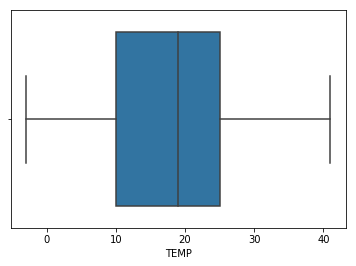

In [67]:
# Fix outliers in columns: HUMI, TEMP, Iws and DEWP
# In statistics, an outlier is an observation point that is distant from other observations.
# Discover outliers with visualization tools
import seaborn as sns
sns.boxplot(x=dataset_Shanghai_clean['TEMP'])


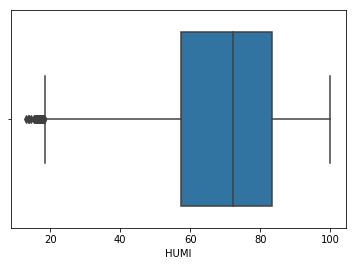

In [68]:
sns.boxplot(x=dataset_Shanghai_clean['HUMI'])


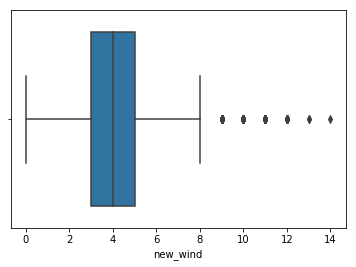

In [69]:
sns.boxplot(x=dataset_Shanghai_clean['new_wind'])


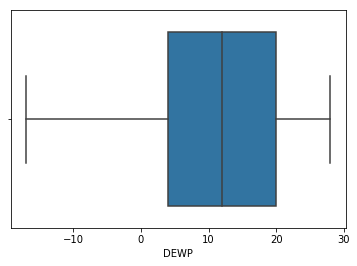

In [70]:
sns.boxplot(x=dataset_Shanghai_clean['DEWP'])

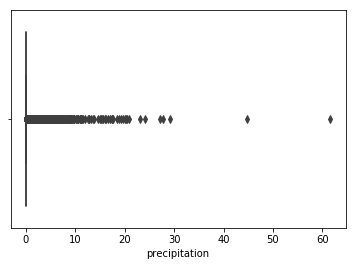

In [71]:
sns.boxplot(x=dataset_Shanghai_clean['precipitation'])

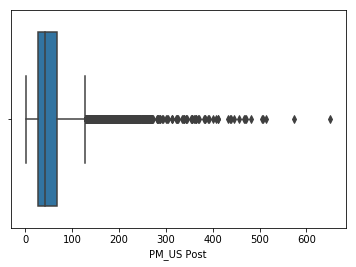

In [72]:
sns.boxplot(x=dataset_Shanghai_clean['PM_US Post'])

In [73]:
Q1 = dataset_Shanghai_clean.quantile(0.25)
Q3 = dataset_Shanghai_clean.quantile(0.75)
IQR = Q3 - Q1
L = IQR + Q3

print(IQR)
print('--')
print(L)

hour             12.00
PM_US Post       41.00
DEWP             16.00
HUMI             26.04
PRES             15.00
TEMP             15.00
precipitation     0.00
new_wind          2.00
year              2.00
month             7.00
day               4.00
dtype: float64
--
hour               30.00
PM_US Post        108.00
DEWP               36.00
HUMI              109.52
PRES             1038.00
TEMP               40.00
precipitation       0.00
new_wind            7.00
year             2017.00
month              17.00
day                 9.00
dtype: float64


In [74]:
# Check HUMIDITY 
(dataset_Shanghai_clean[dataset_Shanghai_clean.DEWP < 0])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
26304,0,4,70.0,-5.0,69.00,1023.0,0.0,SW,0.0,3.0,2013,1,2,Weekdays
26305,1,4,76.0,-5.0,69.00,1023.0,0.0,SW,0.0,2.0,2013,1,2,Weekdays
26306,2,4,72.0,-5.0,69.00,1023.0,0.0,SW,0.0,1.0,2013,1,2,Weekdays
26307,3,4,78.0,-4.0,74.41,1023.0,0.0,SW,0.0,2.0,2013,1,2,Weekdays
26308,4,4,77.0,-4.0,80.04,1023.0,-1.0,SW,0.0,3.0,2013,1,2,Weekdays
26309,5,4,78.0,-4.0,80.04,1023.0,-1.0,SW,0.0,2.0,2013,1,2,Weekdays
26310,6,4,77.0,-4.0,80.04,1023.0,-1.0,SW,0.0,1.0,2013,1,2,Weekdays
26311,7,4,80.0,-4.0,86.15,1024.0,-2.0,cv,0.0,0.0,2013,1,2,Weekdays
26312,8,4,76.0,-5.0,79.89,1024.0,-2.0,cv,0.0,1.0,2013,1,2,Weekdays
26313,9,4,74.0,-3.0,60.25,1025.0,4.0,SW,0.0,4.0,2013,1,2,Weekdays


In [75]:
# Check wind speed 
(dataset_Shanghai_clean[dataset_Shanghai_clean.new_wind > 8])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
26338,10,4,97.0,0.0,65.36,1029.0,6.0,NE,0.0,9.0,2013,1,3,Weekdays
26341,13,4,28.0,-2.0,52.70,1029.0,7.0,NE,0.0,9.0,2013,1,3,Weekdays
26342,14,4,24.0,-2.0,56.45,1031.0,6.0,NE,0.0,9.0,2013,1,3,Weekdays
26343,15,4,36.0,-2.0,60.51,1031.0,5.0,NE,0.0,10.0,2013,1,3,Weekdays
26344,16,4,29.0,-3.0,60.25,1031.0,4.0,NE,0.0,11.0,2013,1,3,Weekdays
26345,17,4,34.0,-4.0,60.00,1033.0,3.0,NE,0.0,10.0,2013,1,3,Weekdays
26347,19,4,32.0,-6.0,59.48,1036.0,1.0,NE,0.0,9.0,2013,1,3,Weekdays
26351,23,4,20.0,-6.0,63.94,1038.0,0.0,NE,0.0,9.0,2013,1,3,Weekdays
27108,12,4,24.0,6.0,71.27,1020.0,11.0,SE,0.0,9.0,2013,2,0,Weekdays
27205,13,4,52.0,0.0,86.58,1028.0,2.0,NE,0.0,9.0,2013,2,4,Weekdays


In [76]:
(dataset_Shanghai_clean[dataset_Shanghai_clean['PM_US Post'] > 108])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
26324,20,4,118.0,-3.0,64.66,1023.0,3.0,SE,0.0,1.0,2013,1,2,Weekdays
26325,21,4,125.0,-2.0,64.90,1023.0,4.0,SE,0.0,1.0,2013,1,2,Weekdays
26326,22,4,136.0,-3.0,69.43,1024.0,2.0,cv,0.0,0.0,2013,1,2,Weekdays
26327,23,4,114.0,-3.0,74.59,1024.0,1.0,NE,0.0,1.0,2013,1,2,Weekdays
26337,9,4,112.0,1.0,70.27,1028.0,6.0,NE,0.0,7.0,2013,1,3,Weekdays
26441,17,4,112.0,-6.0,51.56,1026.0,3.0,NE,0.0,3.0,2013,1,0,Weekdays
26443,19,4,115.0,-5.0,55.63,1027.0,3.0,NE,0.0,2.0,2013,1,0,Weekdays
26444,20,4,110.0,-4.0,60.00,1027.0,3.0,NW,0.0,2.0,2013,1,0,Weekdays
26445,21,4,118.0,-4.0,60.00,1027.0,3.0,NW,0.0,3.0,2013,1,0,Weekdays
26449,1,4,116.0,-2.0,69.64,1026.0,3.0,NW,0.0,3.0,2013,1,1,Weekdays


In [77]:
(dataset_Shanghai_clean[dataset_Shanghai_clean['precipitation'] > 50])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
32440,16,3,27.0,21.0,58.65,1007.0,30.0,NE,61.6,9.0,2013,9,5,Weekends


In [78]:
# Removing precipitation Outliers 
dataset_Shanghai_clean = dataset_Shanghai_clean.drop(dataset_Shanghai_clean[dataset_Shanghai_clean['precipitation'] > 50].index)


In [79]:

print("dataset_Shanghai_clean lenght after removing outliers: ", len(dataset_Shanghai_clean))
dataset_Shanghai_clean.describe()

dataset_Shanghai_clean lenght after removing outliers:  25509


,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,25509.000000,25509.000000,25505.000000,25505.000000,25490.000000,25505.000000,23552.000000,25506.000000,25509.000000,25509.000000,25509.000000
mean,11.512329,53.544357,11.447285,69.509562,1016.007532,17.670653,0.140183,3.987768,2013.990984,6.502489,3.011212
std,6.920065,43.319930,9.561753,17.971906,9.030740,9.082251,0.981560,1.899950,0.813769,3.459510,1.996221
min,0.000000,1.000000,-17.000000,13.090000,990.000000,-3.000000,0.000000,0.000000,2013.000000,1.000000,0.000000
25%,6.000000,26.000000,4.000000,57.440000,1008.000000,10.000000,0.000000,3.000000,2013.000000,3.000000,1.000000
50%,12.000000,41.000000,12.000000,72.230000,1016.000000,19.000000,0.000000,4.000000,2014.000000,6.000000,3.000000
75%,18.000000,67.000000,20.000000,83.480000,1023.000000,25.000000,0.000000,5.000000,2015.000000,10.000000,5.000000
max,23.000000,651.000000,28.000000,100.000000,1040.000000,41.000000,44.700000,14.000000,2015.000000,12.000000,6.000000


In [80]:
# drop rows with missing values
dataset_Shanghai_clean = dataset_Shanghai_clean.dropna(axis=0, how="any")
print("dataset_Beijing_clean lenght after removing missing values: ", len(dataset_Shanghai_clean))


dataset_Beijing_clean lenght after removing missing values:  23534


In [81]:
# Convert month and hour Features to Cyclical Features
dataset_Shanghai_clean['hour_sin'] = np.sin(dataset_Shanghai_clean.hour*(2.*np.pi/24))
dataset_Shanghai_clean['hour_cos'] = np.cos(dataset_Shanghai_clean.hour*(2.*np.pi/24))
dataset_Shanghai_clean['month_sin'] = np.sin((dataset_Shanghai_clean.month-1)*(2.*np.pi/12))
dataset_Shanghai_clean['month_cos'] = np.cos((dataset_Shanghai_clean.month-1)*(2.*np.pi/12))
dataset_Shanghai_clean['day_sin'] = np.sin(dataset_Shanghai_clean.day*(2.*np.pi/7))
dataset_Shanghai_clean['day_cos'] = np.cos(dataset_Shanghai_clean.day*(2.*np.pi/7))

# Drop the original features : season, month, day and hour 
#Unneeded_Columns = ['month', 'hour', 'day']
#dataset_Shanghai_clean = dataset_Shanghai_clean.drop(Unneeded_Columns, axis = 1)
display(dataset_Shanghai_clean.head(n=1))


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
26304,0,4,70.0,-5.0,69.0,1023.0,0.0,SW,0.0,3.0,2013,1,2,Weekdays,0.0,1.0,0.0,1.0,0.974928,-0.222521


In [82]:
# One-hot encode the data using pandas.get_dummies() to convert the non-numeric feature to numeric feature
#dataset_Beijing_clean.month = dataset_Beijing_clean.month.astype('category')
dataset_Shanghai_clean = pd.get_dummies(dataset_Shanghai_clean)


In [83]:
# Rename day type columns 
dataset_Shanghai_clean.rename(columns={"day_Type_Weekdays": "Weekdays", "day_Type_Weekends": "Weekends"}, inplace=True)


In [84]:
dataset_Shanghai_clean.head()

,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,...,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,Weekdays,Weekends
26304,0,70.0,-5.0,69.00,1023.0,0.0,0.0,3.0,2013,1,...,0,0,1,0,0,0,1,0,1,0
26305,1,76.0,-5.0,69.00,1023.0,0.0,0.0,2.0,2013,1,...,0,0,1,0,0,0,1,0,1,0
26306,2,72.0,-5.0,69.00,1023.0,0.0,0.0,1.0,2013,1,...,0,0,1,0,0,0,1,0,1,0
26307,3,78.0,-4.0,74.41,1023.0,0.0,0.0,2.0,2013,1,...,0,0,1,0,0,0,1,0,1,0
26308,4,77.0,-4.0,80.04,1023.0,-1.0,0.0,3.0,2013,1,...,0,0,1,0,0,0,1,0,1,0


In [85]:
dataset_Shanghai_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23534 entries, 26304 to 52583
Data columns (total 28 columns):
hour             23534 non-null int64
PM_US Post       23534 non-null float64
DEWP             23534 non-null float64
HUMI             23534 non-null float64
PRES             23534 non-null float64
TEMP             23534 non-null float64
precipitation    23534 non-null float64
new_wind         23534 non-null float64
year             23534 non-null int64
month            23534 non-null int64
day              23534 non-null int64
hour_sin         23534 non-null float64
hour_cos         23534 non-null float64
month_sin        23534 non-null float64
month_cos        23534 non-null float64
day_sin          23534 non-null float64
day_cos          23534 non-null float64
season_1         23534 non-null uint8
season_2         23534 non-null uint8
season_3         23534 non-null uint8
season_4         23534 non-null uint8
cbwd_NE          23534 non-null uint8
cbwd_NW          23534 no

In [86]:
dataset_Shanghai_clean.describe()

,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,...,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,Weekdays,Weekends
count,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,...,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000,23534.000000
mean,11.603170,54.175066,11.058341,68.905688,1016.183267,17.417226,0.138502,4.058681,2013.939917,6.351067,...,0.233619,0.240078,0.258775,0.369593,0.187601,0.289581,0.120761,0.032464,0.714116,0.285884
std,6.860023,43.992639,9.541708,18.043534,8.969266,9.082164,0.978328,1.882044,0.811390,3.488448,...,0.423142,0.427140,0.437971,0.482705,0.390401,0.453578,0.325857,0.177232,0.451844,0.451844
min,0.000000,1.000000,-17.000000,13.090000,990.000000,-3.000000,0.000000,0.000000,2013.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,26.000000,3.000000,56.690000,1008.000000,10.000000,0.000000,3.000000,2013.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,42.000000,12.000000,70.880000,1016.000000,18.000000,0.000000,4.000000,2014.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,17.000000,67.000000,19.000000,83.130000,1023.000000,24.000000,0.000000,5.000000,2015.000000,9.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23.000000,651.000000,28.000000,100.000000,1040.000000,41.000000,44.700000,14.000000,2015.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
# Total number of records
n_records = len(dataset_Shanghai_clean["PM_US Post"])
# Print the results
print("Total number of records: {}".format(n_records))

Total number of records: 23534


Check List
- Precipitation, Iprec columns have zeros values --> it seems fine
- Drop columns: row, PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan -> done
- Convert Season to categorical -> done
- Year : continuous  
- Fix Month values: Cyclical Features -> done
- Fix Hour values : Cyclical Features -> done 
- Fix day values : Cyclical Features? -> Drop this column 
- Remove records before 2013 -> done
- Add a city column
- Fix outliers in columns: -> done

    * PM_US Post -> remove outlier (values more than 225)
    * HUMI -> Fine range values
    * TEMP -> Fine range values
    * Iws (meters per second) -> http://www.whiteweather.com/wd/vind/Windspeed.htm -> remove outlier (values more than 35)
    * DEWP
    * precipitation -> remove outlier (values more than 50)
    * Iprec
    
- Remove missing values -> done
- Convert Numerical to categorical data -> done

## Storing clean data

In [88]:
# Store the clean DataFrame(s) in a CSV file with name twitter_archive_master.csv
dataset_Shanghai_clean.to_csv('dataset_Shanghai_clean.csv')


## Factors Correlation 

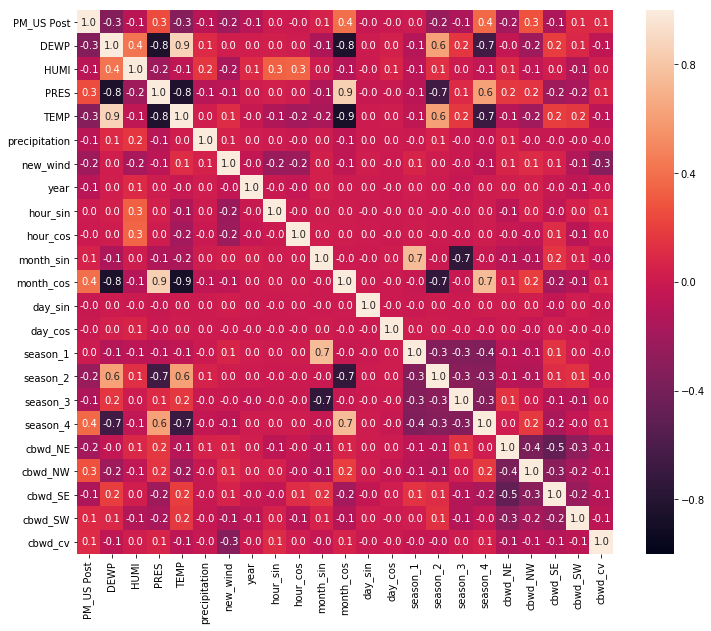

In [27]:
import seaborn as sns
corr = dataset_Shanghai_clean.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1,ax=ax, annot=True, fmt='.1f')

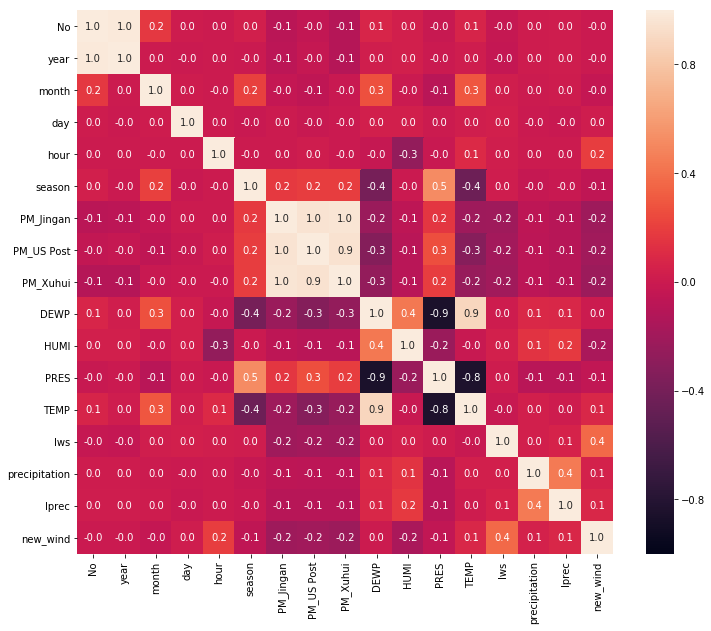

In [27]:
import seaborn as sns
corr = dataset_Shanghai.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1,ax=ax, annot=True, fmt='.1f')

# Implementation 

In [28]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Dara preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split
from sklearn.cross_validation import train_test_split


In [29]:
# Load Guangzhou dataset
Shanghai = pd.read_csv('dataset_Shanghai_clean.csv')
Shanghai = Shanghai.drop('Unnamed: 0', axis = 1)

# Success - Display the first five records
display(Shanghai.head(n=3))

# Total number of records
n_records = len(Shanghai["PM_US Post"])
print("Number of records for Shanghai: ", n_records)
print("*********************")

display(Shanghai.info())


,year,day,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,hour_sin,...,month_cos,season_1,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,2013,1,70.0,-5.0,69.0,1023.0,0.0,0.0,3.0,0.000000,...,1.0,0,0,0,1,0,0,0,1,0
1,2013,1,76.0,-5.0,69.0,1023.0,0.0,0.0,2.0,0.258819,...,1.0,0,0,0,1,0,0,0,1,0
2,2013,1,72.0,-5.0,69.0,1023.0,0.0,0.0,1.0,0.500000,...,1.0,0,0,0,1,0,0,0,1,0


Number of records for Shanghai:  23533
*********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23533 entries, 0 to 23532
Data columns (total 22 columns):
year             23533 non-null int64
day              23533 non-null int64
PM_US Post       23533 non-null float64
DEWP             23533 non-null float64
HUMI             23533 non-null float64
PRES             23533 non-null float64
TEMP             23533 non-null float64
precipitation    23533 non-null float64
new_wind         23533 non-null float64
hour_sin         23533 non-null float64
hour_cos         23533 non-null float64
month_sin        23533 non-null float64
month_cos        23533 non-null float64
season_1         23533 non-null int64
season_2         23533 non-null int64
season_3         23533 non-null int64
season_4         23533 non-null int64
cbwd_NE          23533 non-null int64
cbwd_NW          23533 non-null int64
cbwd_SE          23533 non-null int64
cbwd_SW          23533 non-null int64
cbwd_cv   

None

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


def applyCV(name,estimator):
    # Construct the pipeline with a standard scaler and a small neural network
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append((name, estimator))
    model = Pipeline(estimators)

    # Split the data into features and target label

    features = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'new_wind', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_SW', 'cbwd_cv', 'season_1', 'season_2', 'season_3', 'season_4', 'year']
    #features = ['HUMI', 'PRES', 'TEMP', 'Iws', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
    X = Shanghai[features].values
    y = Shanghai['PM_US Post']

    # We'll use 5-fold cross validation. That is, a random 80% of the data will be used
    # to train the model, and the prediction score will be computed on the remaining 20%.
    # This process is repeated five times such that the training sets in each "fold"
    # are mutually orthogonal.
    kfold = KFold(n_splits=5,  shuffle=True)

    print(estimators)

    print("**cross_val_score + KFold **")

    results_R2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print('CV Scoring Result: r2 : mean=',np.mean(results_R2),'std=',np.std(results_R2))
    #print(results_R2) 
    print("**************")
    
    results_MAE = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    print('CV Scoring Result: MAE : mean=',np.mean(results_MAE),'std=',np.std(results_MAE))
    #print(results_MAE)  
    print("**************")

    results_MSE = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print('CV Scoring Result: MSE : mean=',np.mean(results_MSE),'std=',np.std(results_MSE))
    #print(results_MSE) 
    
    print("***********************************")

    print("**cross_validate**")
    
    scores = cross_validate(model, X, y, scoring=('r2'), cv = 5)
    print('CV Scoring Result: r2 : mean=',np.mean(scores['test_score']))
    #print(scores)  
    print("**************")

    scores = cross_validate(model, X, y, scoring=('neg_mean_absolute_error'), cv = 5)
    print('CV Scoring Result: MAE : mean=',np.mean(scores['test_score']))
    #print(scores)  
    print("**************")

    scores = cross_validate(model, X, y, scoring=('neg_mean_squared_error'), cv = 5)
    print('CV Scoring Result: MSE : mean=',np.mean(scores['test_score']))
    #print(scores) 
    print("-----------------------------------------------")

    
applyCV("LR",LinearRegression())
print("*******************************************")
applyCV("RF",RandomForestRegressor(n_estimators = 96))
print("*******************************************")
applyCV("ANN",MLPRegressor(hidden_layer_sizes= (128, 256)))
print("*******************************************")
applyCV("SVR",SVR(kernel='rbf'))


[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]
**cross_val_score + KFold **
CV Scoring Result: r2 : mean= 0.2970725172448401 std= 0.005276393254210767
**************
CV Scoring Result: MAE : mean= -15.865041086921627 std= 0.3077765320280438
**************
CV Scoring Result: MSE : mean= -401.6896131991484 std= 7.4398670505550655
***********************************
**cross_validate**
CV Scoring Result: r2 : mean= 0.24399715022107832
**************
CV Scoring Result: MAE : mean= -16.209744191849584
**************
CV Scoring Result: MSE : mean= -419.20840271754906
-----------------------------------------------
*******************************************
[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impu

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Scoring Result: r2 : mean= -0.2686845400229029
**************
CV Scoring Result: MAE : mean= -21.133695529734887
**************
CV Scoring Result: MSE : mean= -614.0431175222507
-----------------------------------------------
*******************************************
[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]
**cross_val_score + KFold **
CV Scoring Result: r2 : mean= 0.35857359207241324 std= 0.01239571416507543
**************
CV Scoring Result: MAE : mean= -14.399819060527062 std= 0.11701068938352774
**************
CV Scoring Result: MSE : mean= -366.65804012187596 std= 9.321042797101606
***********************************
**cross_validate**
CV Scoring Result: r2 : mean= 0.27173268146103735
**************
CV Scoring Result: MAE : mean= -15.294594163991315
**************
CV Scoring Result: MSE : 

In [30]:
Un_needed_columns = ['PM_US Post', 'day']
# Split the data into features and target label
Features = Shanghai.drop(Un_needed_columns, axis = 1)
Target = Shanghai['PM_US Post']

# Saving feature names for later use
feature_list = list(Features.columns)

display(Features.head(n=2))
display(Target.head(n=2))

,year,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,hour_sin,hour_cos,month_sin,month_cos,season_1,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,2013,-5.0,69.0,1023.0,0.0,0.0,3.0,0.000000,1.000000,0.0,1.0,0,0,0,1,0,0,0,1,0
1,2013,-5.0,69.0,1023.0,0.0,0.0,2.0,0.258819,0.965926,0.0,1.0,0,0,0,1,0,0,0,1,0


0    70.0
1    76.0
Name: PM_US Post, dtype: float64

In [31]:
#Shuffle and Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.33, random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression

Linear_regression = LinearRegression()
start_Training_time = int(time() * 1000)
Linear_regression.fit(X_train, y_train)
end_Training_time = int(time() * 1000)

print( "Linear Regression: " )
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))


predict = Linear_regression.predict(X_test)

r2 = r2_score(y_test, predict)
MSE =  mean_squared_error(y_test,predict)

print('Testing: ')
print ('Testing r2_score: ', round(r2, 5))
print('Testing MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predict)
print('MAE_score: ', round(MAE, 5))

# Calculate the absolute errors
errors = abs(predict - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Linear Regression: 
Training: 
Training took 9 ms
Testing: 
Testing r2_score:  0.31568
Testing MSE_score:  1308.4833
MAE_score:  24.8282
Mean Absolute Error: 24.83 degrees.
Accuracy: 30.31 %.


In [34]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 96)

start_Training_time = int(time() * 1000)
rf.fit(X_train, y_train) 
end_Training_time = int(time() * 1000)

print('Random Forest Regressor: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))


start_Testing_time = int(time() * 1000)
predictions = rf.predict(X_test)
end_Testing_time = int(time() * 1000)

print('Testing: ')
print('Testing took {} ms'.format(end_Testing_time - start_Testing_time))
print('r2_score: ', round(r2_score(y_test,predictions),5))
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', round(MAE, 5))


# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Random Forest Regressor: 
Training: 
Training took 6157 ms
Testing: 
Testing took 206 ms
r2_score:  0.68388
MSE_score:  604.44955
MAE_score:  15.23228
Mean Absolute Error: 15.23 degrees.
Accuracy: 59.44 %.


In [13]:
rf1 = RandomForestRegressor(n_estimators = 96)

# Feature Scaling
#Sc_X1 = StandardScaler()
#CorrelatedFeaturesScaled = Sc_X1.fit_transform(Features)

from sklearn.model_selection import cross_validate
scores = cross_validate(rf1, Features, Target, scoring=('r2'), cv = 5)
print(scores)  

{'fit_time': array([6.74754572, 7.22434998, 5.82309389, 6.71248698, 6.77360487]), 'score_time': array([0.07009816, 0.09123397, 0.06974316, 0.062886  , 0.10363007]), 'test_score': array([-0.08908733,  0.18851291,  0.30611836,  0.07220024,  0.0339113 ]), 'train_score': array([0.95395265, 0.95114583, 0.953716  , 0.95280951, 0.95317998])}


In [14]:
# Saving feature names for later use
feature_list = list(Features.columns)


# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DEWP                 Importance: 0.17
Variable: HUMI                 Importance: 0.11
Variable: PRES                 Importance: 0.11
Variable: TEMP                 Importance: 0.09
Variable: new_wind             Importance: 0.08
Variable: hour_sin             Importance: 0.06
Variable: hour_cos             Importance: 0.06
Variable: month_sin            Importance: 0.06
Variable: year                 Importance: 0.05
Variable: cbwd_NE              Importance: 0.05
Variable: month_cos            Importance: 0.04
Variable: cbwd_SE              Importance: 0.04
Variable: precipitation        Importance: 0.03
Variable: season_1             Importance: 0.01
Variable: season_3             Importance: 0.01
Variable: cbwd_NW              Importance: 0.01
Variable: cbwd_SW              Importance: 0.01
Variable: season_2             Importance: 0.0
Variable: season_4             Importance: 0.0
Variable: cbwd_cv              Importance: 0.0


In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

mlp = MLPRegressor(hidden_layer_sizes= (128, 256))
start_Training_time = int(time() * 1000)
mlp.fit(X_train,y_train)
end_Training_time = int(time() * 1000)

print('Neural Network / MLPRegressor: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))

predictions = mlp.predict(X_test)

print('Testing: ')
r2 = r2_score(y_test,predictions)
print('r2_score: ', r2)
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', MSE)
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', MAE)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Neural Network / MLPRegressor: 
Training: 
Training took 20230 ms
Testing: 
r2_score:  0.5585955422575539
MSE_score:  844.0049460649055
MAE_score:  19.284796930999605
Mean Absolute Error: 19.28 degrees.
Accuracy: 50.1 %.


In [36]:
from sklearn.svm import SVR

clf = SVR(kernel='rbf')
start_Training_time = int(time() * 1000)
clf.fit(X_train, y_train) 
end_Training_time = int(time() * 1000)

print('Support Vector Regression: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))

start_Testing_time = int(time() * 1000)
predictions = clf.predict(X_test)
end_Testing_time = int(time() * 1000)

print('Testing: ')
print('Testing took {} ms'.format(end_Testing_time - start_Testing_time))
print('r2_score: ', round(r2_score(y_test,predictions),5))
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', MAE)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Support Vector Regression: 
Training: 
Training took 11857 ms
Testing: 
Testing took 4556 ms
r2_score:  0.33559
MSE_score:  1270.41293
MAE_score:  21.632381759503495
Mean Absolute Error: 21.63 degrees.
Accuracy: 51.27 %.
